In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import scipy.io as io

In [2]:
# Load data
dat=io.loadmat("D:\Machine Learning\Machine Learning Course Era\machine-learning-ex3\machine-learning-ex3\ex3\ex3data1.mat")
raw_dat=np.concatenate((dat['X'], dat['y']), axis=1)
shf_dat=shuffle(raw_dat)

In [3]:
# Create input and output arrays from loaded data
X=shf_dat[:,0:400]
Y=shf_dat[:,400]
Y[Y==10]=0
Y=Y.reshape((len(Y),1))
numclass=np.unique(Y)
print('Classes: ', numclass)


print('Shape of X Data: ', X.shape)
print('Shape of Y Data: ', Y.shape)

# Convert the labels to 10 point arrays with 1 at Label number
Target=np.zeros((Y.shape[0], len(numclass)))
for i in range(Y.shape[0]):
    Target[i,int(Y[i,0])]=1.0


Classes:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Shape of X Data:  (5000, 400)
Shape of Y Data:  (5000, 1)


In [5]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val=train_test_split(X, Target, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test=train_test_split(X_val, Y_val, test_size=0.15, random_state=42)

X_train.shape, Y_train.shape

((3500, 400), (3500, 10))

In [6]:
# Create input and output arrays for splitted data

X_train=np.transpose(X_train)
X_val=np.transpose(X_val)
X_test=np.transpose(X_test)

Y_train=np.transpose(Y_train)
Y_val=np.transpose(Y_val)
Y_test=np.transpose(Y_test)

print('Shape of Train Data: ', X_train.shape, Y_train.shape)
print('Shape of Validation Data: ', X_val.shape, Y_val.shape)
print('Shape of Test Data: ', X_test.shape, Y_test.shape)

Shape of Train Data:  (400, 3500) (10, 3500)
Shape of Validation Data:  (400, 1275) (10, 1275)
Shape of Test Data:  (400, 225) (10, 225)


[8.]
[3.]
[6.]
[5.]
[3.]
[1.]
[1.]
[0.]
[3.]
[9.]
[4.]
[4.]
[2.]
[2.]
[1.]
[2.]
[0.]
[4.]
[2.]
[4.]


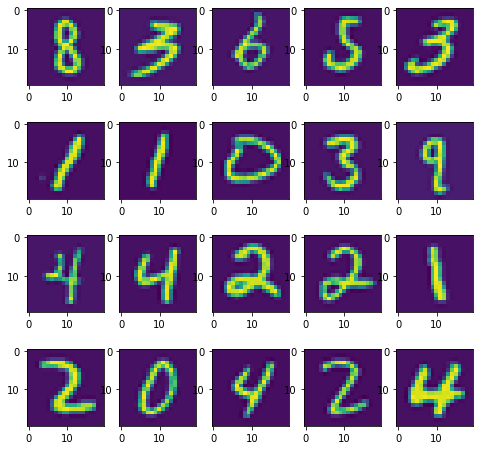

In [7]:
# Visualize random images from input data:

randimg=np.random.randint(5000, size=(20))
rows=4
cols=5

fig=plt.figure(figsize=(8,8))
for i in range(len(randimg)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(np.transpose(X[randimg[i]].reshape(20,20)))
    print(Y[randimg[i]])

In [8]:
#X_train = np.loadtxt('Downloads/train_X.csv', delimiter = ',').T
#Y_train = np.loadtxt('Downloads/train_label.csv', delimiter = ',').T

#X_test = np.loadtxt('Downloads/test_X.csv', delimiter = ',').T
#Y_test = np.loadtxt('Downloads/test_label.csv', delimiter = ',').T
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (400, 3500)
shape of Y_train : (10, 3500)
shape of X_test : (400, 225)
shape of Y_test : (10, 225)


In [10]:
# Define activation functions

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1+np.exp(-z))

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX=np.exp(x)
    return expX/np.sum(expX, axis=0)

In [11]:
# Define derivation of activation functions 

def dertanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derrelu(x):
    return np.array(x>0, dtype='float32')

def dersigmoid(x):
    return np.multiply(x,(1-x))

In [12]:
# Inititalize the weight and biasing matrices

def initialize_parameters(nx, nh, ny):
    w1=np.random.randn(nh,nx)*0.01
    b1=np.zeros((nh,1))
    
    w2=np.random.randn(ny,nh)*0.01
    b2=np.zeros((ny,1))
    
    parameters={'w1':w1,
                 'b1':b1,
                 'w2':w2,
                 'b2':b2}
    return parameters

In [13]:
# Forward Propagation Step
def forward_propagation(x, parameters):
    
    w1=parameters['w1']
    b1=parameters['b1']
    
    w2=parameters['w2']
    b2=parameters['b2']
    
    z1=np.dot(w1,x)+b1
    a1=tanh(z1)
    
    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)
    
    forward_cache={'z1':z1,
                   'a1':a1,
                   'z2':z2,
                   'a2':a2}
    
    return forward_cache
    

In [14]:
# Define cost function
def cost_function(a2,y):
    m=y.shape[1]
    cost=-1/m*np.sum(y*np.log(a2))
    return cost

In [15]:
# define backward propagation:

def backward_propagation(x,y,parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*dertanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    
    return gradients
    
    

In [16]:
# Update the weight and biasing matrix

def update_parameters(parameters, gradients, learning_rate):
    w1=parameters['w1']
    b1=parameters['b1']
    
    w2=parameters['w2']
    b2=parameters['b2']
    
    dw1=gradients['dw1']
    db1=gradients['db1']
    
    dw2=gradients['dw2']
    db2=gradients['db2']
    
    #print(np.max(dw1, axis=0))
    #print(dw2)
    
    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2
    
    parameters={'w1':w1,
                 'b1':b1,
                 'w2':w2,
                 'b2':b2}
    return parameters

In [17]:
# combine all the steps to create the model
def model(x,y,nh, learning_rate, itr):
    nx=x.shape[0]
    ny=y.shape[0]
    
    parameters=initialize_parameters(nx,nh,ny)
    
    cost_list=[]
    
    for i in range(itr):
        forward_cache=forward_propagation(x, parameters)
        cost=cost_function(forward_cache['a2'],y)
        gradients=backward_propagation(x,y,parameters, forward_cache)
        #print(np.max(gradients['dw2'][:,0:2]))
        parameters=update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(itr/10)==0):
           print('Cost after ', i, 'iterations: ', cost)
           
    
    return parameters, cost_list

In [24]:
# Train your madel
itr=1000
nh=1000
Parameters, Cost_list=model(X_train, Y_train, nh, 0.5, itr)

Cost after  0 iterations:  2.2994509168802457
Cost after  100 iterations:  1.0505351432211145
Cost after  200 iterations:  0.7561344660965653
Cost after  300 iterations:  0.6295271224781986
Cost after  400 iterations:  0.557127270564014
Cost after  500 iterations:  0.5092515532054194
Cost after  600 iterations:  0.47471878726489164
Cost after  700 iterations:  0.4483322946140413
Cost after  800 iterations:  0.42732682986262305
Cost after  900 iterations:  0.4100850787147592


In [36]:
# Define and Calculate accuracy:

def accuracy(x,y, parameters):
    a_out=forward_propagation(x,parameters)
    a_out=a_out['a2']
    a_out=np.argmax(a_out, 0)
    
    labels=np.argmax(y,0)
    
    acc=np.mean(a_out==labels)*100
    
    return acc

print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", accuracy(X_test, Y_test, Parameters), "%")

Accuracy of Train Dataset 90.11428571428571 %
Accuracy of Test Dataset 92.0 %


In [37]:
https://github.com/tusharg025/Codes.git

SyntaxError: invalid syntax (<ipython-input-37-55f92fd9bfd6>, line 1)